In [108]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

In [110]:
df = pd.read_csv('~/datasets/pds/summaries/2021_all_nodes.csv')

In [124]:
def barplot_node(node):
    df_filt = df.loc[df['node'] == node]
    fig = px.bar(df_filt, x='month_yr', y='data_transmit_tb', color='user_type', barmode='group')
    fig.update_xaxes(title_text='Month year')
    fig.update_yaxes(title_text='GET Response transfers (TB)')
    fig.update_layout(title_text=f"PDS {node} Node Data Transferred (Terabytes/Month)", title_x=0.5)
    fig.show()
    return df_filt

In [114]:
df['month_yr'] = pd.to_datetime(df['month_yr'])
df.sort_values(by=['node', 'month_yr'], inplace=True)
df['data_transmit_tb' ] = (df['data_transmit_gb'] / 2**10).round(2)

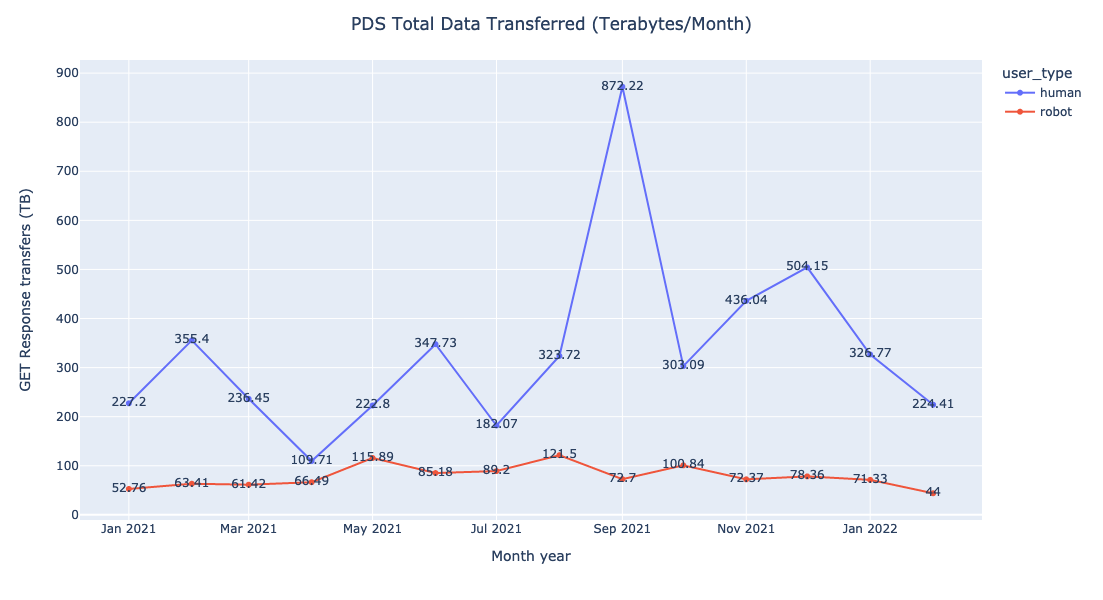

In [118]:
df_sum = df.groupby(by=['month_yr', 'user_type']).agg({'data_transmit_gb': 'sum', 'data_transmit_tb': 'sum'}).reset_index().copy()
df_sum['data_transmit_tb'] = df_sum['data_transmit_tb'].round(2)
df_sum['data_transmit_gb'] = df_sum['data_transmit_gb'].round(2)
df_sum = df_sum[2:-2] # Cut off incomplete records
fig = px.line(df_sum, x='month_yr', y='data_transmit_tb', 
              color='user_type', text='data_transmit_tb')
fig.update_xaxes(title_text='Month year')
fig.update_yaxes(title_text='GET Response transfers (TB)')
fig.update_layout(title_text="PDS Total Data Transferred (Terabytes/Month)", title_x=0.5,
                  height=600)
fig.show()

In [119]:
df_sum

,month_yr,user_type,data_transmit_gb,data_transmit_tb
2,2021-01-01,human,232655.46,227.20
3,2021-01-01,robot,54023.26,52.76
4,2021-02-01,human,363920.89,355.40
5,2021-02-01,robot,64933.50,63.41
6,2021-03-01,human,242119.21,236.45
7,2021-03-01,robot,62896.18,61.42
8,2021-04-01,human,112336.66,109.71
9,2021-04-01,robot,68082.96,66.49
10,2021-05-01,human,228145.58,222.80
11,2021-05-01,robot,118675.82,115.89


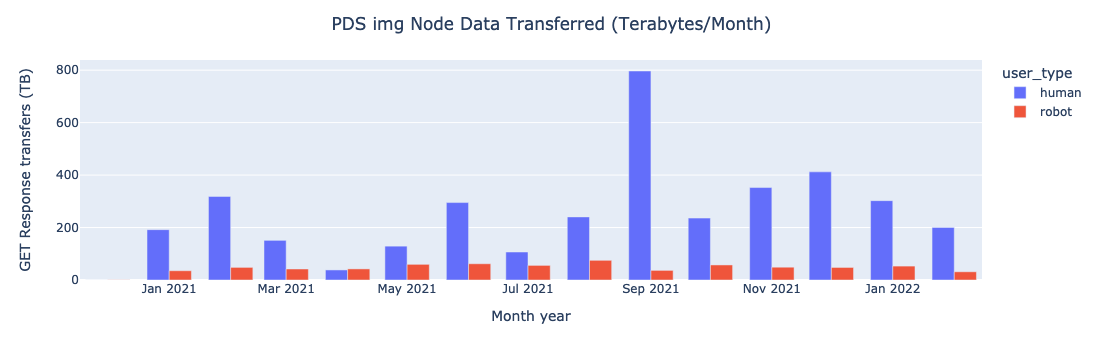

,month_yr,user_type,data_transmit_gb,node,data_transmit_tb
84,2020-12-01,human,52.085535,img,0.05
85,2020-12-01,robot,618.266851,img,0.60
58,2021-01-01,human,196500.717601,img,191.90
59,2021-01-01,robot,36204.499038,img,35.36
62,2021-02-01,human,326335.858773,img,318.69
63,2021-02-01,robot,49266.451235,img,48.11
66,2021-03-01,human,154835.655351,img,151.21
67,2021-03-01,robot,42970.123066,img,41.96
68,2021-04-01,human,39270.609322,img,38.35
69,2021-04-01,robot,43330.060853,img,42.31


In [125]:
barplot_node('img')

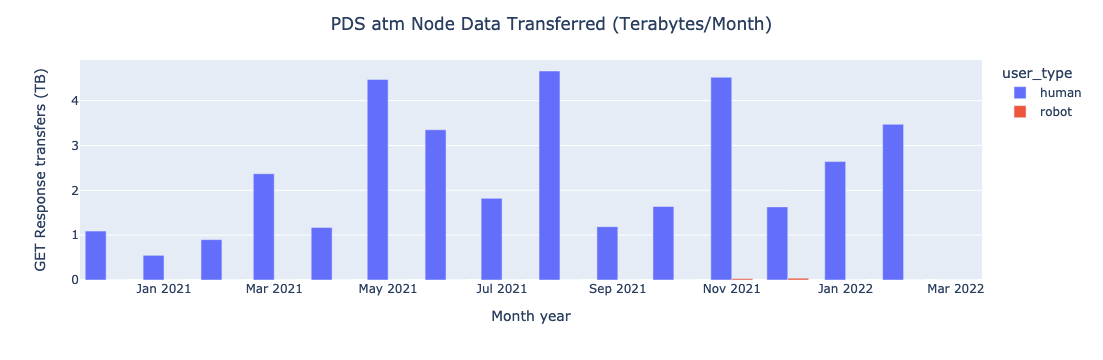

,month_yr,user_type,data_transmit_gb,node,data_transmit_tb
28,2020-12-01,human,1115.419245,atm,1.09
29,2020-12-01,robot,1.152792,atm,0.00
0,2021-01-01,human,566.817100,atm,0.55
1,2021-01-01,robot,0.289216,atm,0.00
4,2021-02-01,human,921.731571,atm,0.90
5,2021-02-01,robot,0.267586,atm,0.00
8,2021-03-01,human,2424.867331,atm,2.37
9,2021-03-01,robot,0.451695,atm,0.00
12,2021-04-01,human,1195.278018,atm,1.17
13,2021-04-01,robot,0.122141,atm,0.00


In [126]:
barplot_node('atm')

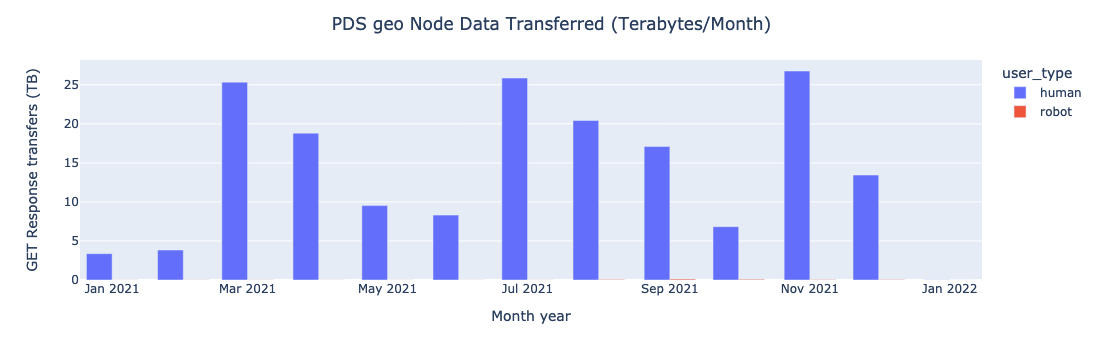

,month_yr,user_type,data_transmit_gb,node,data_transmit_tb
32,2021-01-01,human,3450.415963,geo,3.37
33,2021-01-01,robot,9.604248,geo,0.01
36,2021-02-01,human,3931.809501,geo,3.84
37,2021-02-01,robot,17.457675,geo,0.02
38,2021-03-01,human,25950.447310,geo,25.34
39,2021-03-01,robot,16.841077,geo,0.02
40,2021-04-01,human,19260.774789,geo,18.81
41,2021-04-01,robot,12.672461,geo,0.01
42,2021-05-01,human,9757.299181,geo,9.53
43,2021-05-01,robot,13.885576,geo,0.01


In [127]:
barplot_node('geo')

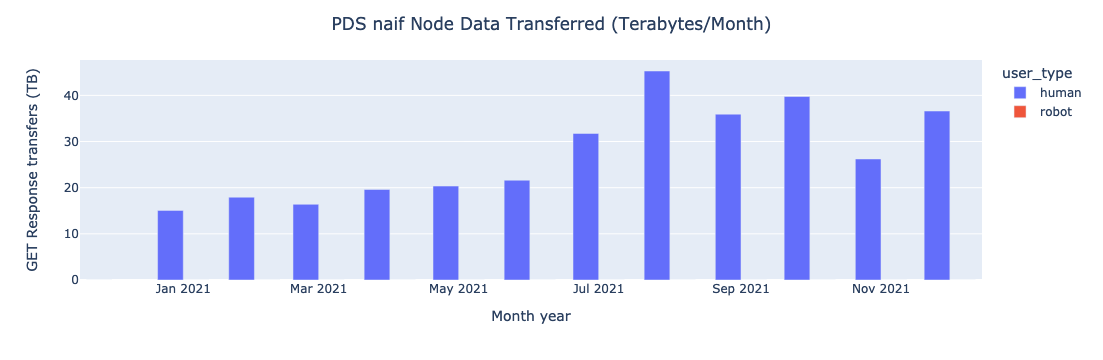

,month_yr,user_type,data_transmit_gb,node,data_transmit_tb
110,2020-12-01,human,1.630089,naif,0.00
88,2021-01-01,human,15445.391415,naif,15.08
89,2021-01-01,robot,0.003647,naif,0.00
90,2021-02-01,human,18366.582080,naif,17.94
91,2021-02-01,robot,0.003017,naif,0.00
92,2021-03-01,human,16795.924445,naif,16.40
93,2021-03-01,robot,0.003534,naif,0.00
94,2021-04-01,human,20079.005898,naif,19.61
95,2021-04-01,robot,0.003549,naif,0.00
96,2021-05-01,human,20838.864738,naif,20.35


In [128]:
barplot_node('naif')

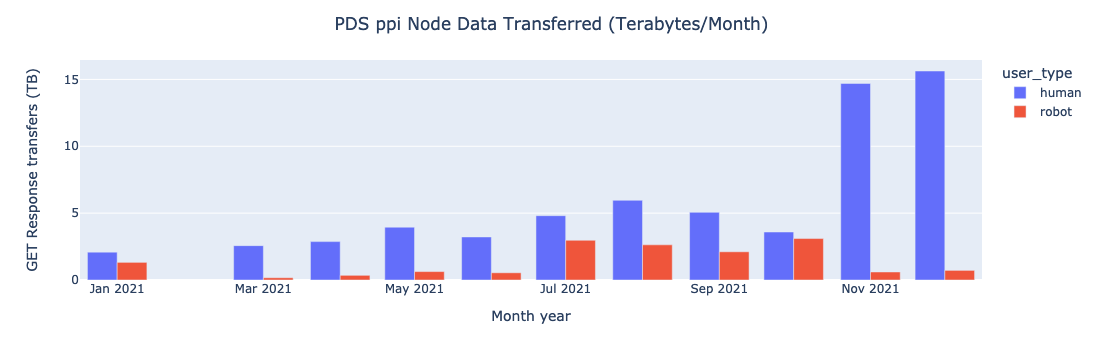

,month_yr,user_type,data_transmit_gb,node,data_transmit_tb
113,2021-01-01,human,2134.838508,ppi,2.08
114,2021-01-01,robot,1352.369984,ppi,1.32
115,2021-03-01,human,2627.804613,ppi,2.57
116,2021-03-01,robot,171.290311,ppi,0.17
117,2021-04-01,human,2938.336493,ppi,2.87
118,2021-04-01,robot,354.070085,ppi,0.35
119,2021-05-01,human,4041.430366,ppi,3.95
120,2021-05-01,robot,650.020554,ppi,0.63
121,2021-06-01,human,3295.540986,ppi,3.22
122,2021-06-01,robot,548.725704,ppi,0.54


In [129]:
barplot_node('ppi')

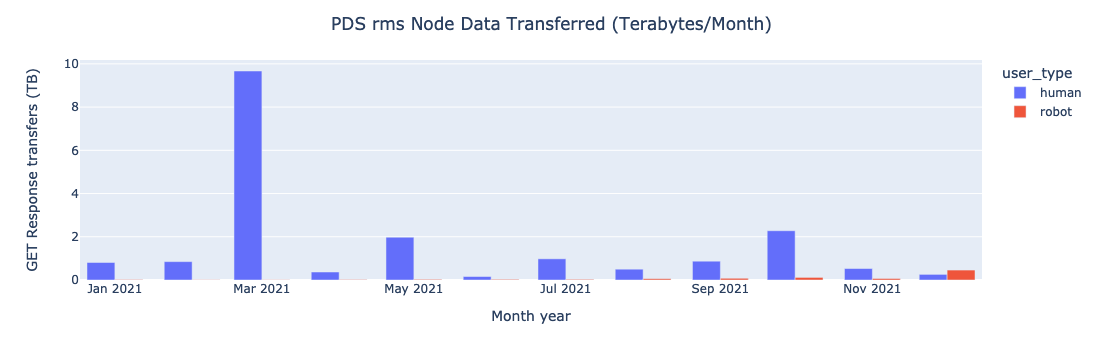

,month_yr,user_type,data_transmit_gb,node,data_transmit_tb
135,2021-01-01,human,827.718638,rms,0.81
136,2021-01-01,robot,19.109641,rms,0.02
137,2021-02-01,human,867.391631,rms,0.85
138,2021-02-01,robot,14.257546,rms,0.01
139,2021-03-01,human,9902.162231,rms,9.67
140,2021-03-01,robot,14.347074,rms,0.01
141,2021-04-01,human,378.470800,rms,0.37
142,2021-04-01,robot,16.713578,rms,0.02
143,2021-05-01,human,2026.235444,rms,1.98
144,2021-05-01,robot,34.155751,rms,0.03


In [130]:
barplot_node('rms')

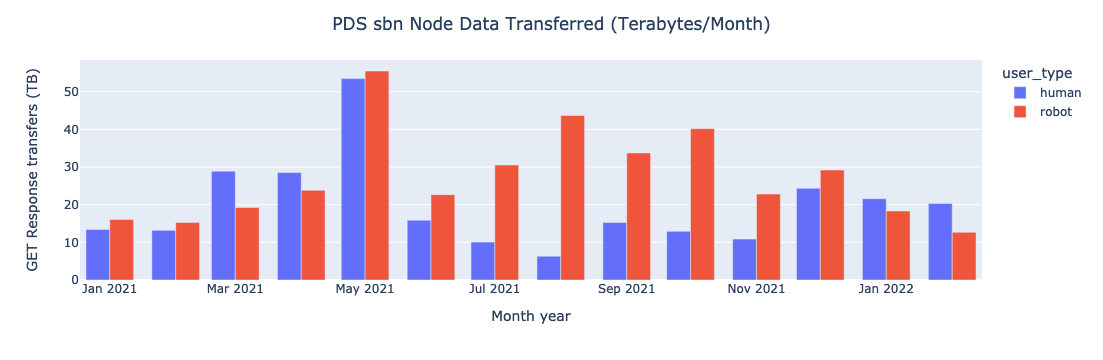

,month_yr,user_type,data_transmit_gb,node,data_transmit_tb
159,2021-01-01,human,13729.555808,sbn,13.41
160,2021-01-01,robot,16437.380987,sbn,16.05
163,2021-02-01,human,13497.512168,sbn,13.18
164,2021-02-01,robot,15635.058255,sbn,15.27
167,2021-03-01,human,29582.349727,sbn,28.89
168,2021-03-01,robot,19723.122696,sbn,19.26
169,2021-04-01,human,29214.185119,sbn,28.53
170,2021-04-01,robot,24369.313446,sbn,23.80
171,2021-05-01,human,54744.826078,sbn,53.46
172,2021-05-01,robot,56806.449234,sbn,55.48


In [131]:
barplot_node('sbn')

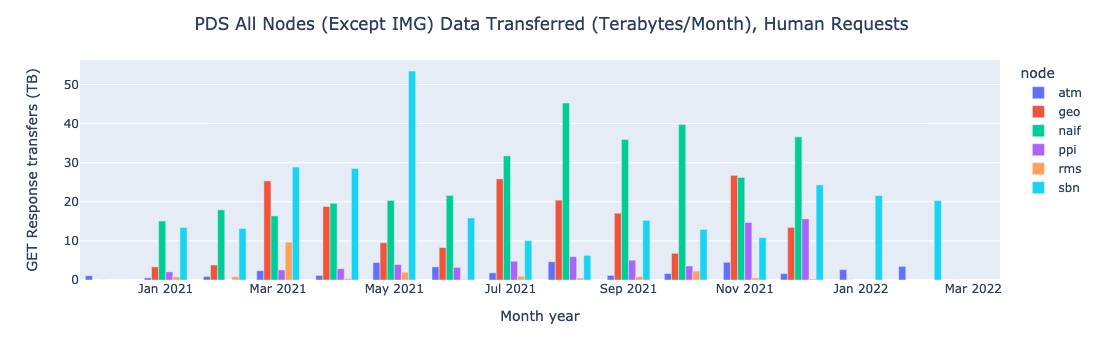

In [132]:
df_filt = df.loc[(df['node'] != 'img') & (df['user_type'] == 'human')]
fig = px.bar(df_filt, x='month_yr', y='data_transmit_tb',
             color='node', barmode='group', orientation='v')
fig.update_xaxes(title_text='Month year')
fig.update_yaxes(title_text='GET Response transfers (TB)')
fig.update_layout(title_text="PDS All Nodes (Except IMG) Data Transferred (Terabytes/Month), Human Requests", title_x=0.5)
fig.show()

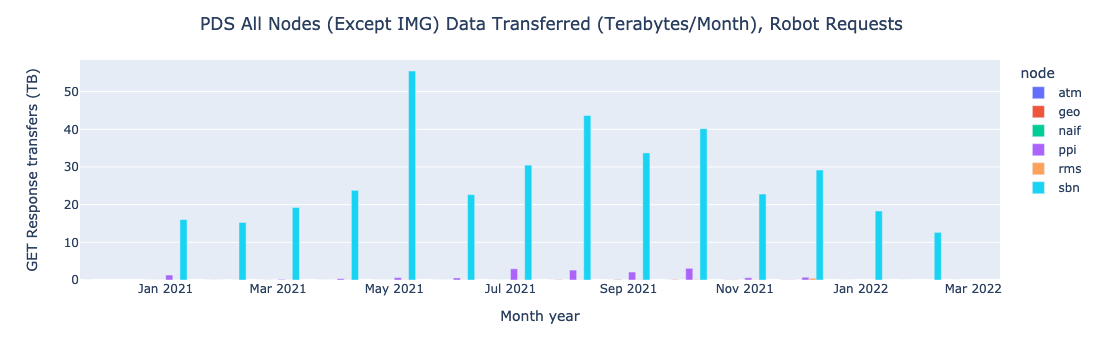

In [133]:
df_filt = df.loc[(df['node'] != 'img') & (df['user_type'] == 'robot')]
fig = px.bar(df_filt, x='month_yr', y='data_transmit_tb',
             color='node', barmode='group', orientation='v')
fig.update_xaxes(title_text='Month year')
fig.update_yaxes(title_text='GET Response transfers (TB)')
fig.update_layout(title_text="PDS All Nodes (Except IMG) Data Transferred (Terabytes/Month), Robot Requests", title_x=0.5)
fig.show()